In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/gurgaon_properties_cleaned_v2 (1).csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [3]:
df.shape

(3803, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(3677, 23)

## Property Type

<Axes: xlabel='property_type'>

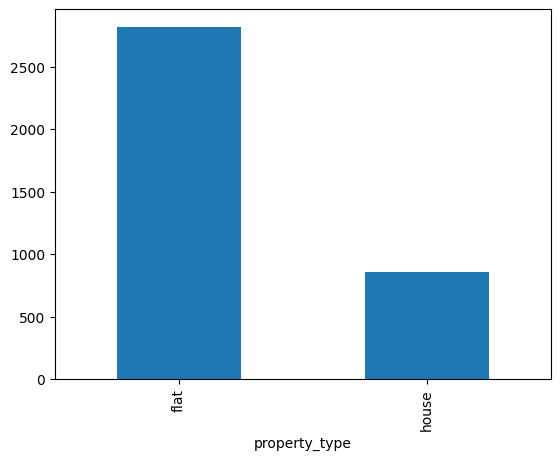

In [8]:
df['property_type'].value_counts().plot(kind='bar')

**Observations** -
**Flats are in majority (75%) and houses are less in number ~ (25%)**

## Society

In [9]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

**Observations** -
**About 486 flats are independent means they do not belong to any society**

In [10]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)
# if we take the top 75 aparatments then 50% data is coming from them only

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [11]:
society_counts = df[df['society'] != 'independent']['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 0,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.

<ipython-input-12-a4adffc2369e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_societies.index, y=top_10_societies.values, palette="Blues_d")


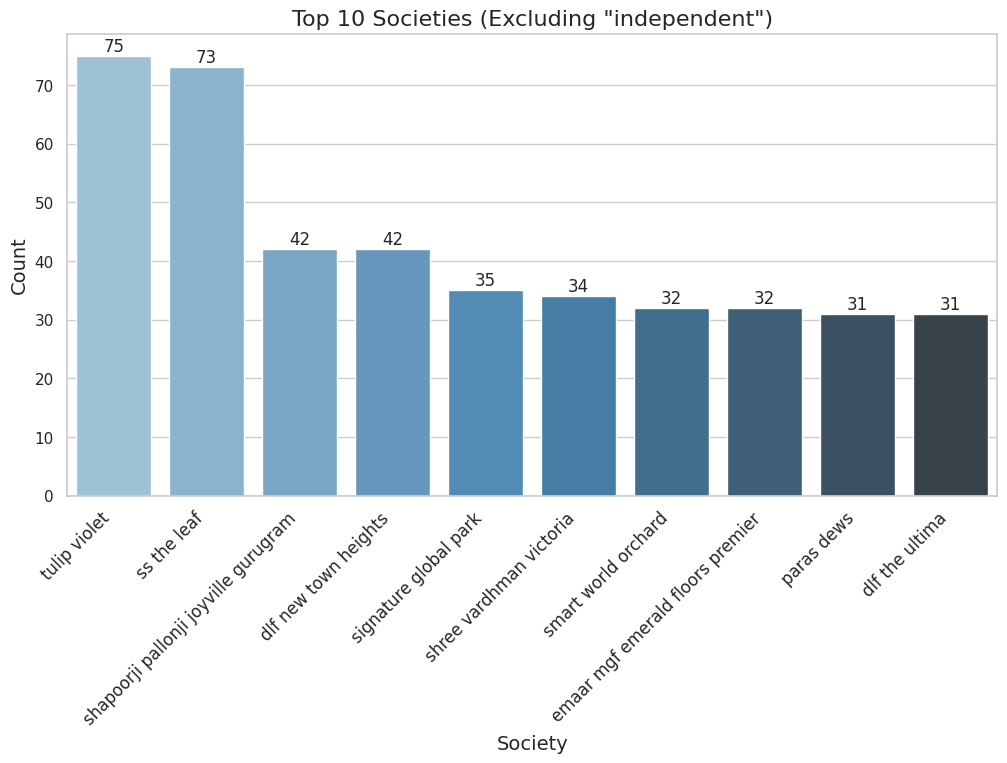

In [12]:
top_10_societies = df[df['society'] != 'independent']['society'].value_counts().head(10)

fig = plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=top_10_societies.index, y=top_10_societies.values, palette="Blues_d")

# Adding titles and labels
plt.title('Top 10 Societies (Excluding "independent")', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count labels on top of the bars
for i, count in enumerate(top_10_societies.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

In [13]:
df['society'].isnull().sum()

1

**Observations** -

In [14]:
# sector -
df['sector'].value_counts().shape

(104,)

<ipython-input-15-617de117a4c1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values, palette="Blues_d")


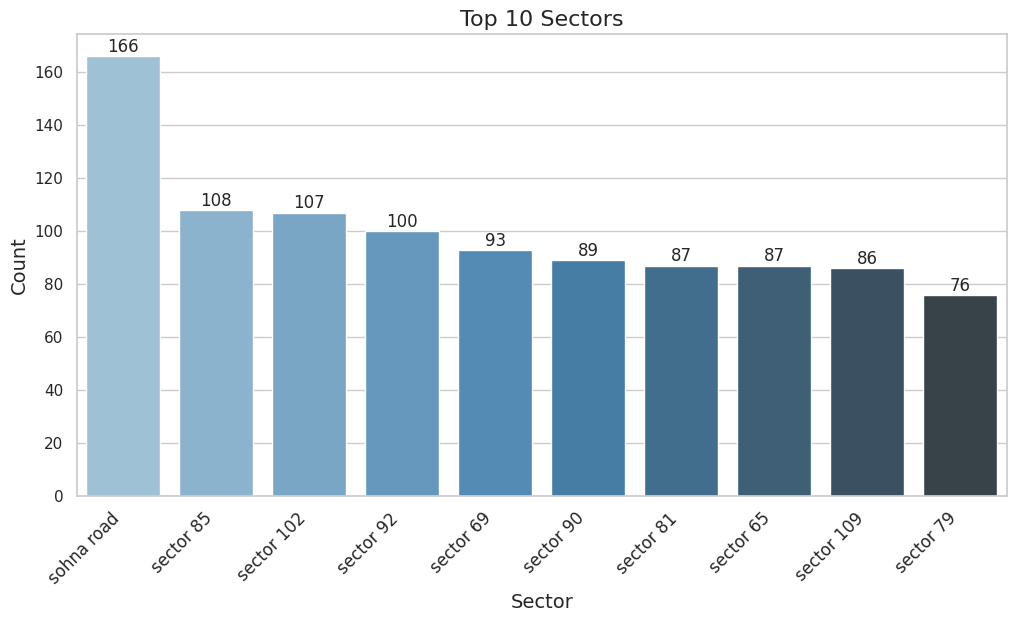

In [15]:
top_10_sectors = df['sector'].value_counts().head(10)

# Setting up the plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values, palette="Blues_d")

# Adding titles and labels
plt.title('Top 10 Sectors', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count labels on top of the bars
for i, count in enumerate(top_10_sectors.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

In [16]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 60,
 'Low (2-9)': 16,
 'Very Low (1)': 0}

## Price

In [17]:
df['price'].isnull().sum()

17

In [18]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

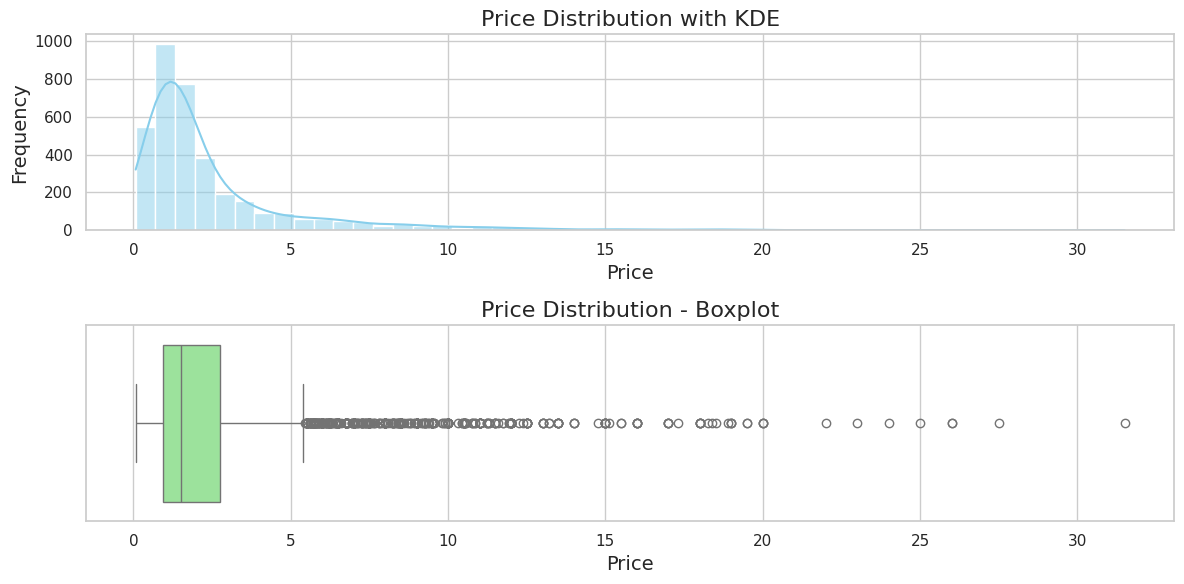

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Price Distribution with KDE', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Creating the boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Price Distribution - Boxplot', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Adjusting layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


**The above distribution is right skewed which means that most of the houses are in range of 1 to 5 cr but some houses are extremely costly**

### Descriptive Statistics

- **Count**: There are 3,660 non-missing price entries.
- **Mean Price**: The average price is approximately 2.53 crores.
- **Median Price**: The median (or 50th percentile) price is 1.52 crores.
- **Standard Deviation**: The prices have a standard deviation of 2.98, indicating variability in the prices.
- **Range**: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- **IQR**: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

### Visualizations

- **Distribution**: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- **Box Plot**: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- **Missing Values**: There are 17 missing values in the price column.


In [20]:
# Skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2791704733134623 14.933372629214258


**Skewness** : The price distribution has a skewness of approximately 3.27, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.85. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [21]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

## Quantile Analysis

- **1% Quantile**: Only 1% of properties are priced below 0.25 crores.
- **5% Quantile**: 5% of properties are priced below 0.37 crores.
- **95% Quantile**: 95% of properties are priced below 8.5 crores.
- **99% Quantile**: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.


In [22]:
# Outler identification using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [23]:
lower_bound = Q3 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

0.04999999999999982 5.45


In [24]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [25]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

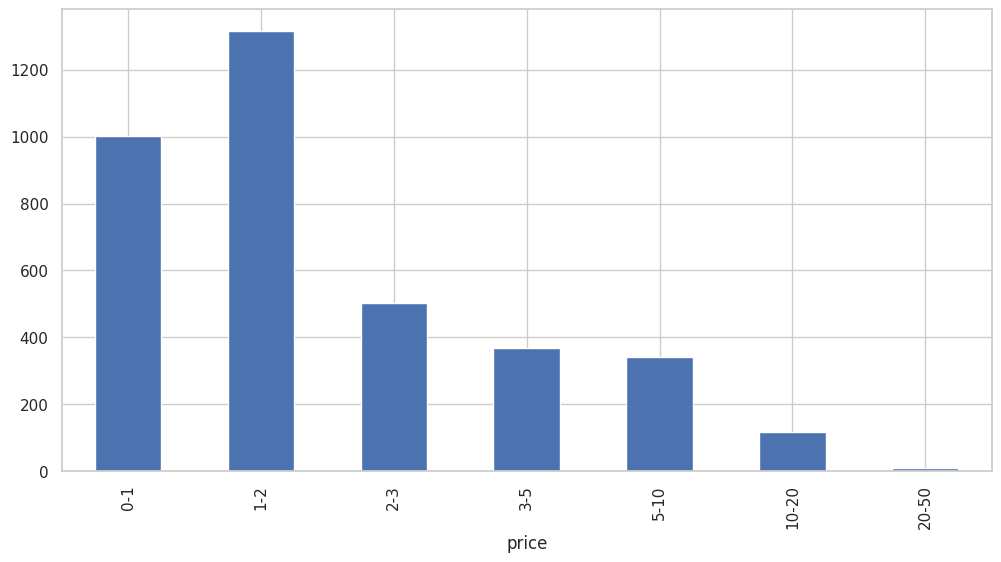

In [26]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
plt.figure(figsize=(12,6))
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

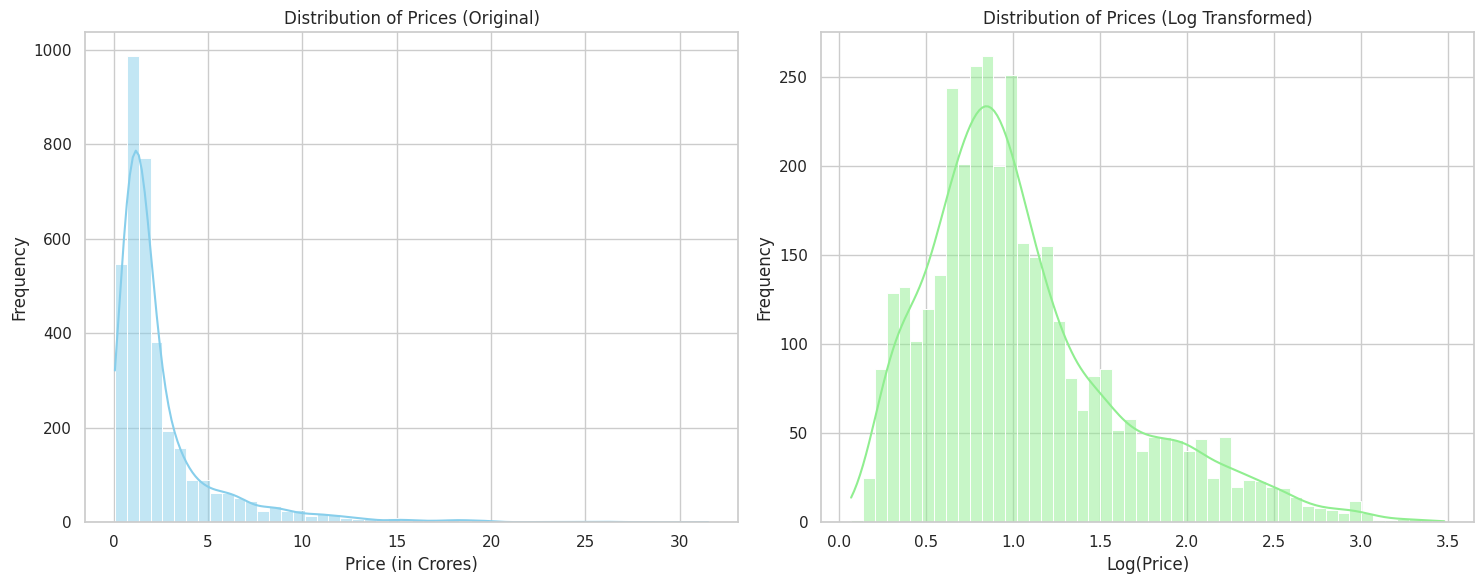

In [27]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

## Price per sqft

In [28]:
df['price_per_sqft'].isnull().sum()

17

In [29]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

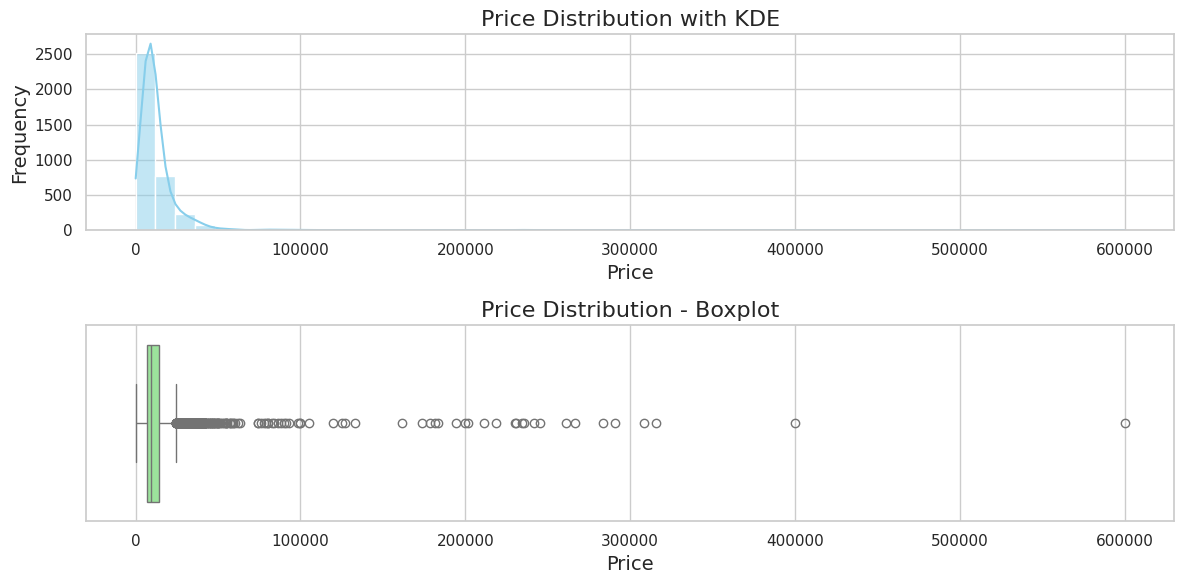

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
sns.histplot(df['price_per_sqft'], kde=True, bins=50, color='skyblue')
plt.title('Price Distribution with KDE', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Creating the boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')
plt.title('Price Distribution - Boxplot', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Adjusting layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


**Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.**

**The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers**

## Bedroom

In [31]:
df['bedRoom'].isnull().sum()

0

In [32]:
df['bedRoom'].value_counts()

bedRoom
3     1496
2      942
4      660
5      210
1      124
6       74
9       41
8       30
12      28
7       28
10      20
16      12
13       4
18       2
19       2
11       1
20       1
14       1
21       1
Name: count, dtype: int64

<ipython-input-33-18720c150ea8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=bedroom_counts.index, y=bedroom_counts.values, palette="Blues_d")


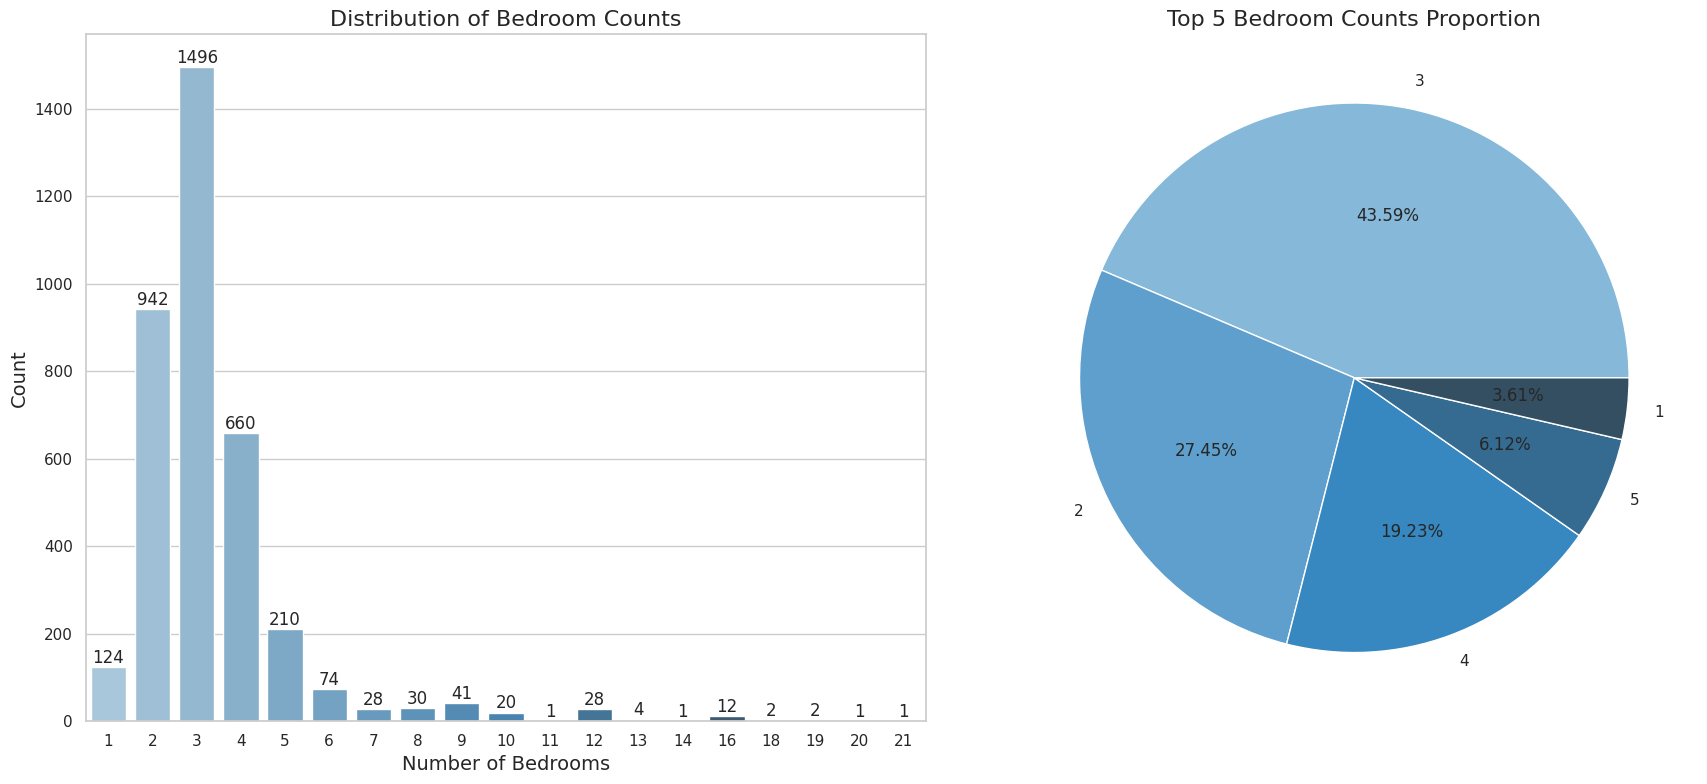

In [33]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
bedroom_counts = df['bedRoom'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=bedroom_counts.index, y=bedroom_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of Bedroom Counts', fontsize=16)
axs[0].set_xlabel('Number of Bedrooms', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(bedroom_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
bedroom_counts_normalized = df['bedRoom'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(bedroom_counts_normalized))
bedroom_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 Bedroom Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Bathroom

In [34]:
df['bathroom'].isnull().sum()

0

<ipython-input-35-c5efc094e66a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=bathroom_counts.index, y=bathroom_counts.values, palette="Blues_d")


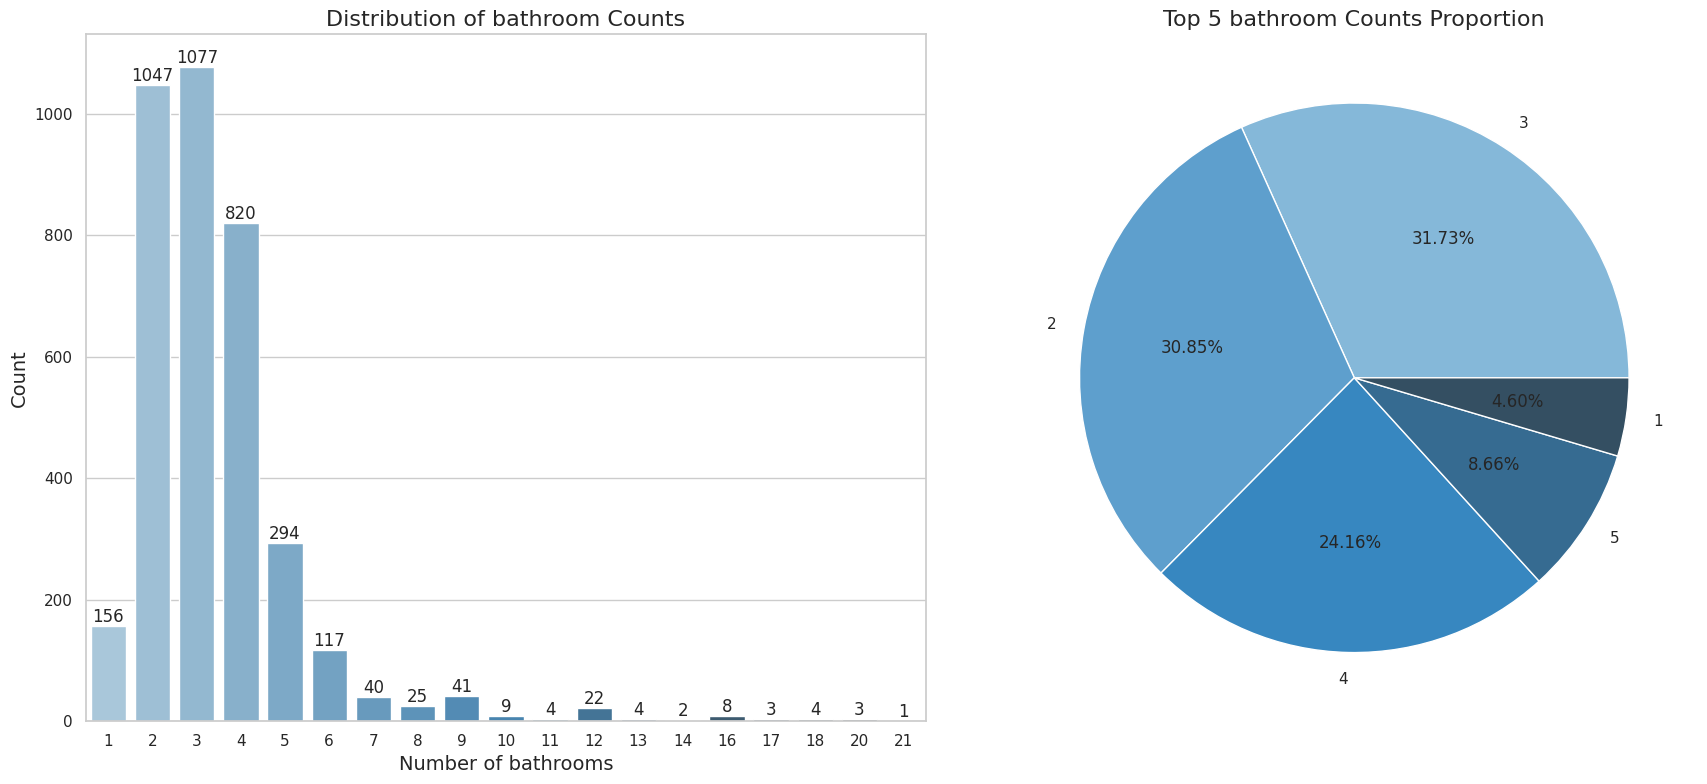

In [35]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
bathroom_counts = df['bathroom'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=bathroom_counts.index, y=bathroom_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of bathroom Counts', fontsize=16)
axs[0].set_xlabel('Number of bathrooms', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(bathroom_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
bathroom_counts_normalized = df['bathroom'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(bathroom_counts_normalized))
bathroom_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 bathroom Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Balcony

In [36]:
df['balcony'].isnull().sum()

0

<ipython-input-37-93be8dfc801e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=balcony_counts.index, y=balcony_counts.values, palette="Blues_d")


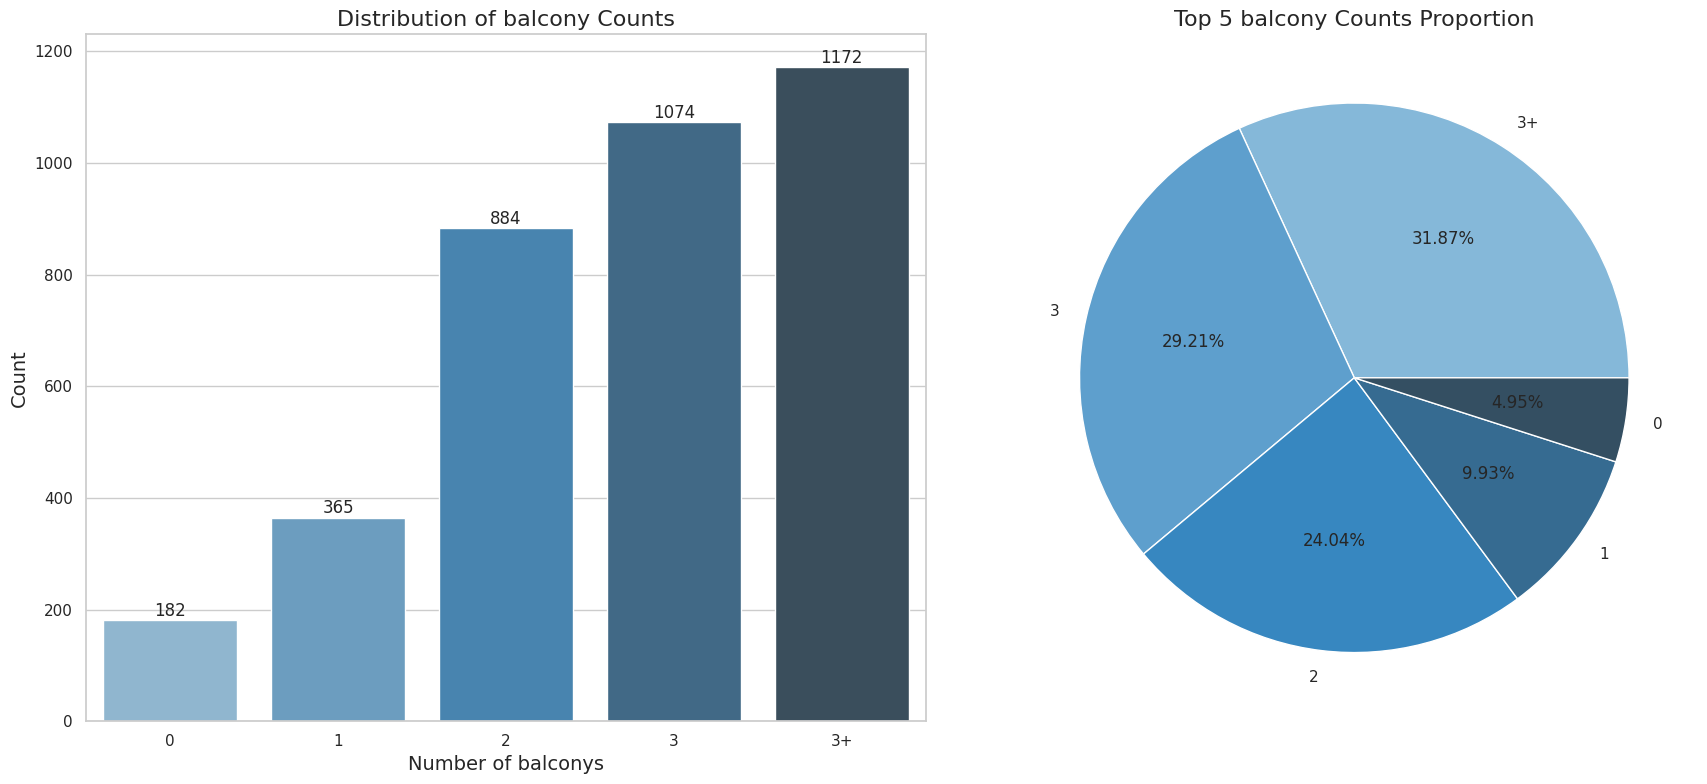

In [37]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
balcony_counts = df['balcony'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=balcony_counts.index, y=balcony_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of balcony Counts', fontsize=16)
axs[0].set_xlabel('Number of balconys', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(balcony_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
balcony_counts_normalized = df['balcony'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(balcony_counts_normalized))
balcony_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 balcony Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Floor number

In [38]:
df['floorNum'].isnull().sum()

19

In [39]:
df['floorNum'].value_counts()

floorNum
3.0     498
2.0     493
1.0     351
4.0     316
8.0     195
6.0     183
10.0    179
7.0     176
5.0     169
9.0     161
12.0    158
0.0     129
11.0    113
14.0    112
15.0     80
16.0     52
17.0     46
13.0     42
18.0     36
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
26.0      5
30.0      5
33.0      4
28.0      4
29.0      3
31.0      3
32.0      2
43.0      2
34.0      2
39.0      2
35.0      2
44.0      1
45.0      1
51.0      1
38.0      1
40.0      1
Name: count, dtype: int64

In [40]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<ipython-input-41-1282148446a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floors.index, y=floors.values, palette="Blues_d")


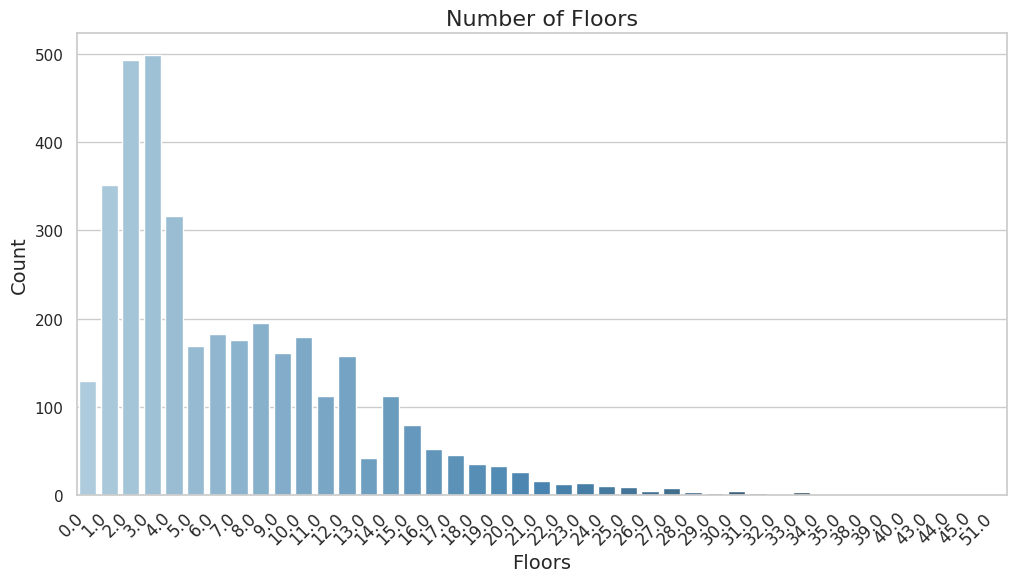

In [41]:
floors = df['floorNum'].value_counts()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=floors.index, y=floors.values, palette="Blues_d")

# Adding titles and labels
plt.title('Number of Floors', fontsize=16)
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.show()

Text(0.5, 0, 'Number of floors')

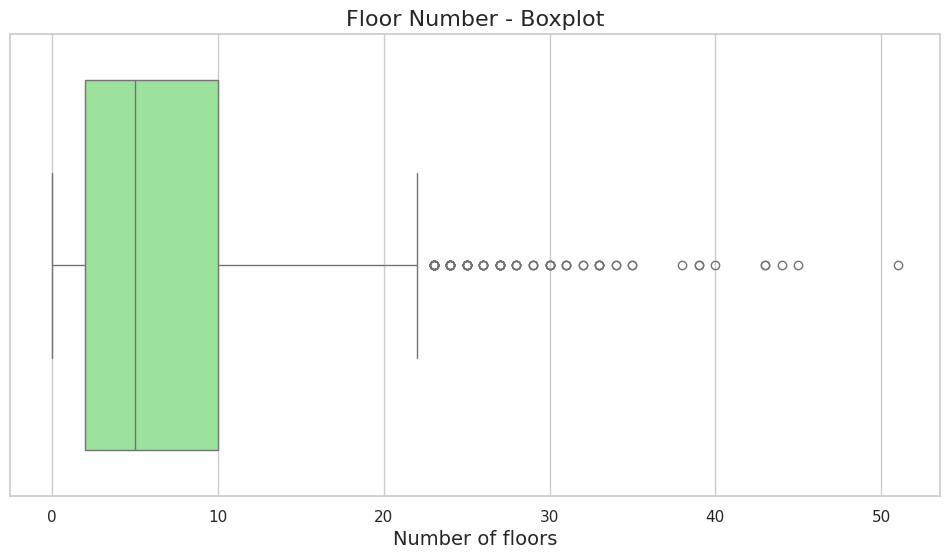

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['floorNum'], color='lightgreen')
plt.title('Floor Number - Boxplot', fontsize=16)
plt.xlabel('Number of floors', fontsize=14)

## Floor Distribution Analysis

- **Majority of Properties**: The majority of the properties lie between the ground floor (0) and the 25th floor.
- **Common Floors**: Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- **Higher Floors**: There are a few properties located at higher floors, but their frequency is much lower.
- **Box Plot Insights**:
  - The majority of the properties are concentrated around the lower floors.
  - The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
  - Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.


## Super built up area

In [43]:
df['super_built_up_area'].isnull().sum()

1802

In [44]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<ipython-input-45-c27038dc3336>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['super_built_up_area'], palette="Blues_d",kde=True)


<Axes: xlabel='super_built_up_area', ylabel='Count'>

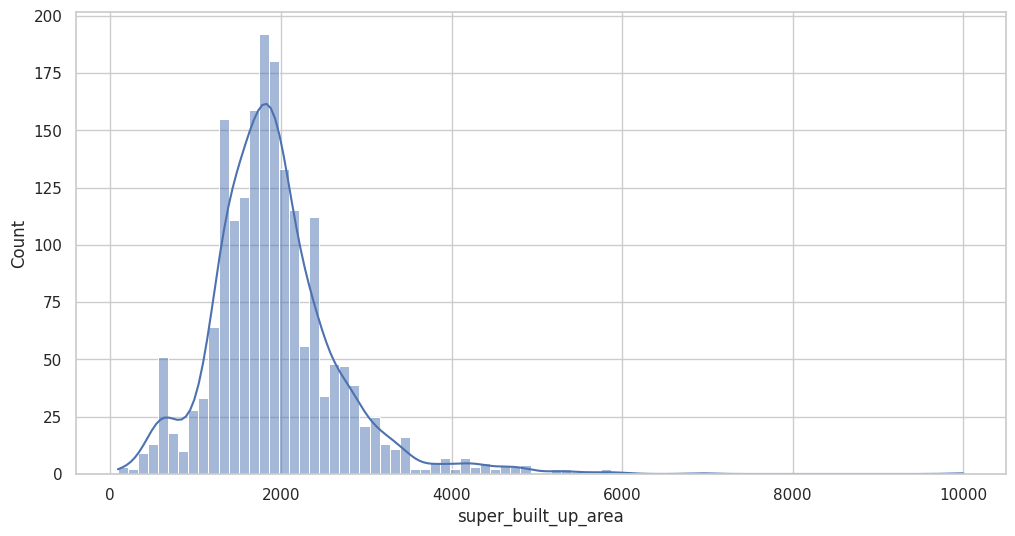

In [45]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.histplot(df['super_built_up_area'], palette="Blues_d",kde=True)

<Axes: xlabel='super_built_up_area'>

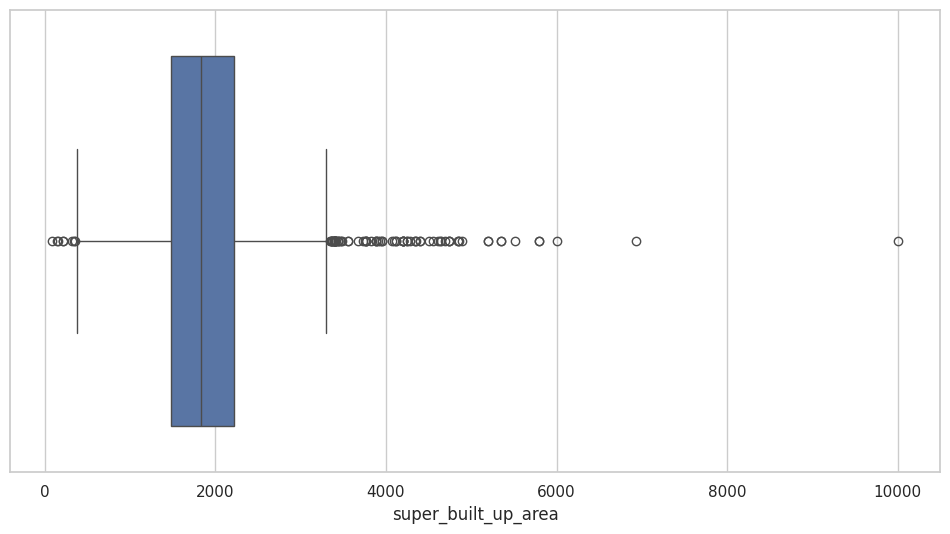

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['super_built_up_area'].dropna())

- **Common Range**: Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- **Right-Skewed Distribution**: There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- **Interquartile Range (IQR)**: The IQR lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- **Potential Outliers**: There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.


## Built Up Area

In [47]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

**Such high values indicates that there surely is some data error**

In [48]:
df_temp = df[df['built_up_area'] != df['built_up_area'].max()]

In [49]:
df_temp['built_up_area'].describe()

count     1689.000000
mean      1944.554783
std       1453.383249
min          2.000000
25%       1100.000000
50%       1650.000000
75%       2400.000000
max      13500.000000
Name: built_up_area, dtype: float64

<ipython-input-50-16edd55e1966>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_temp['built_up_area'], palette="Blues_d",kde=True)


<Axes: xlabel='built_up_area', ylabel='Count'>

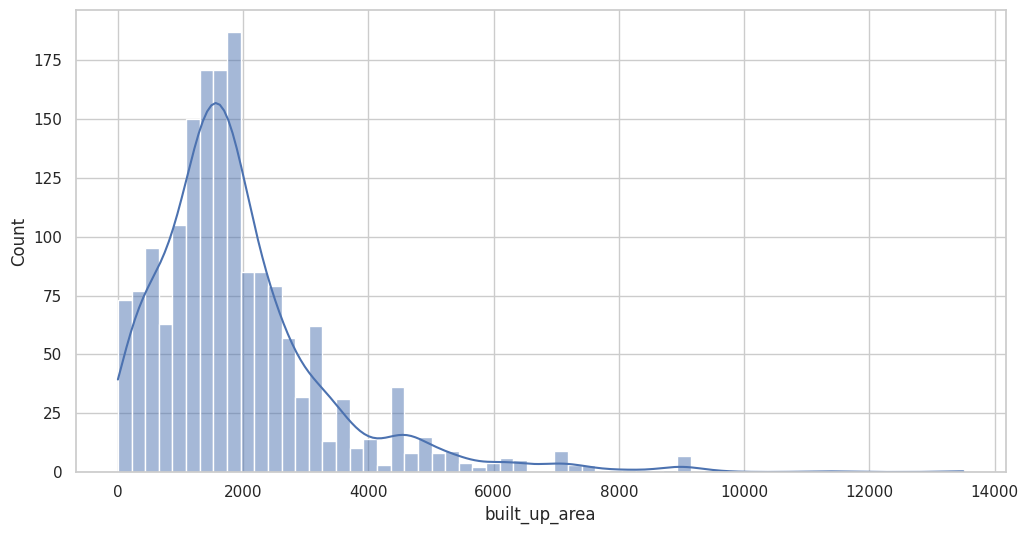

In [50]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.histplot(df_temp['built_up_area'], palette="Blues_d",kde=True)

<Axes: xlabel='built_up_area'>

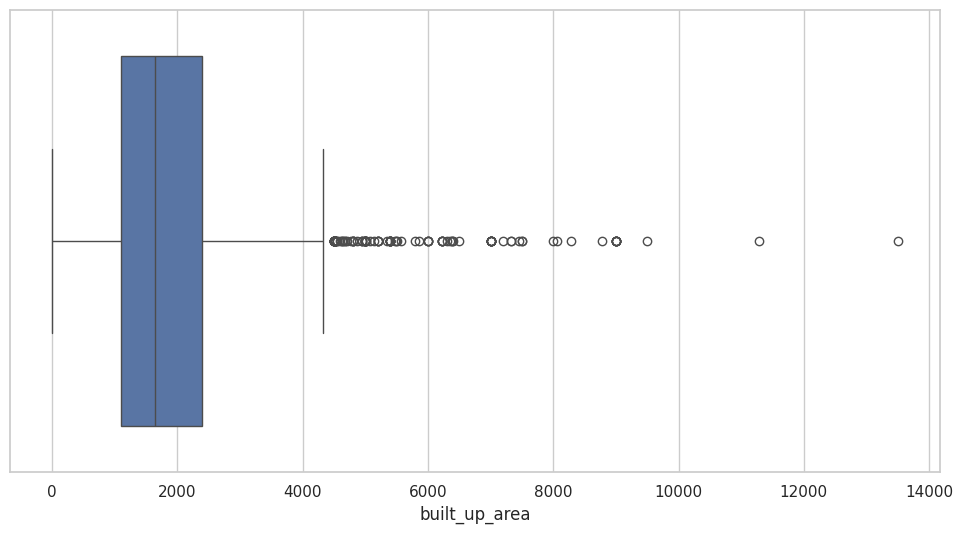

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_temp['built_up_area'].dropna())

## Carpet Area

In [52]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

In [53]:
df_temp_carpet = df[df['carpet_area'] != df['carpet_area'].max()]

In [54]:
df_temp_carpet['carpet_area'].describe()

count      1871.000000
mean       2205.605579
std       18000.198664
min          15.000000
25%         841.000000
50%        1300.000000
75%        1787.500000
max      569243.000000
Name: carpet_area, dtype: float64

## Additional Rooms

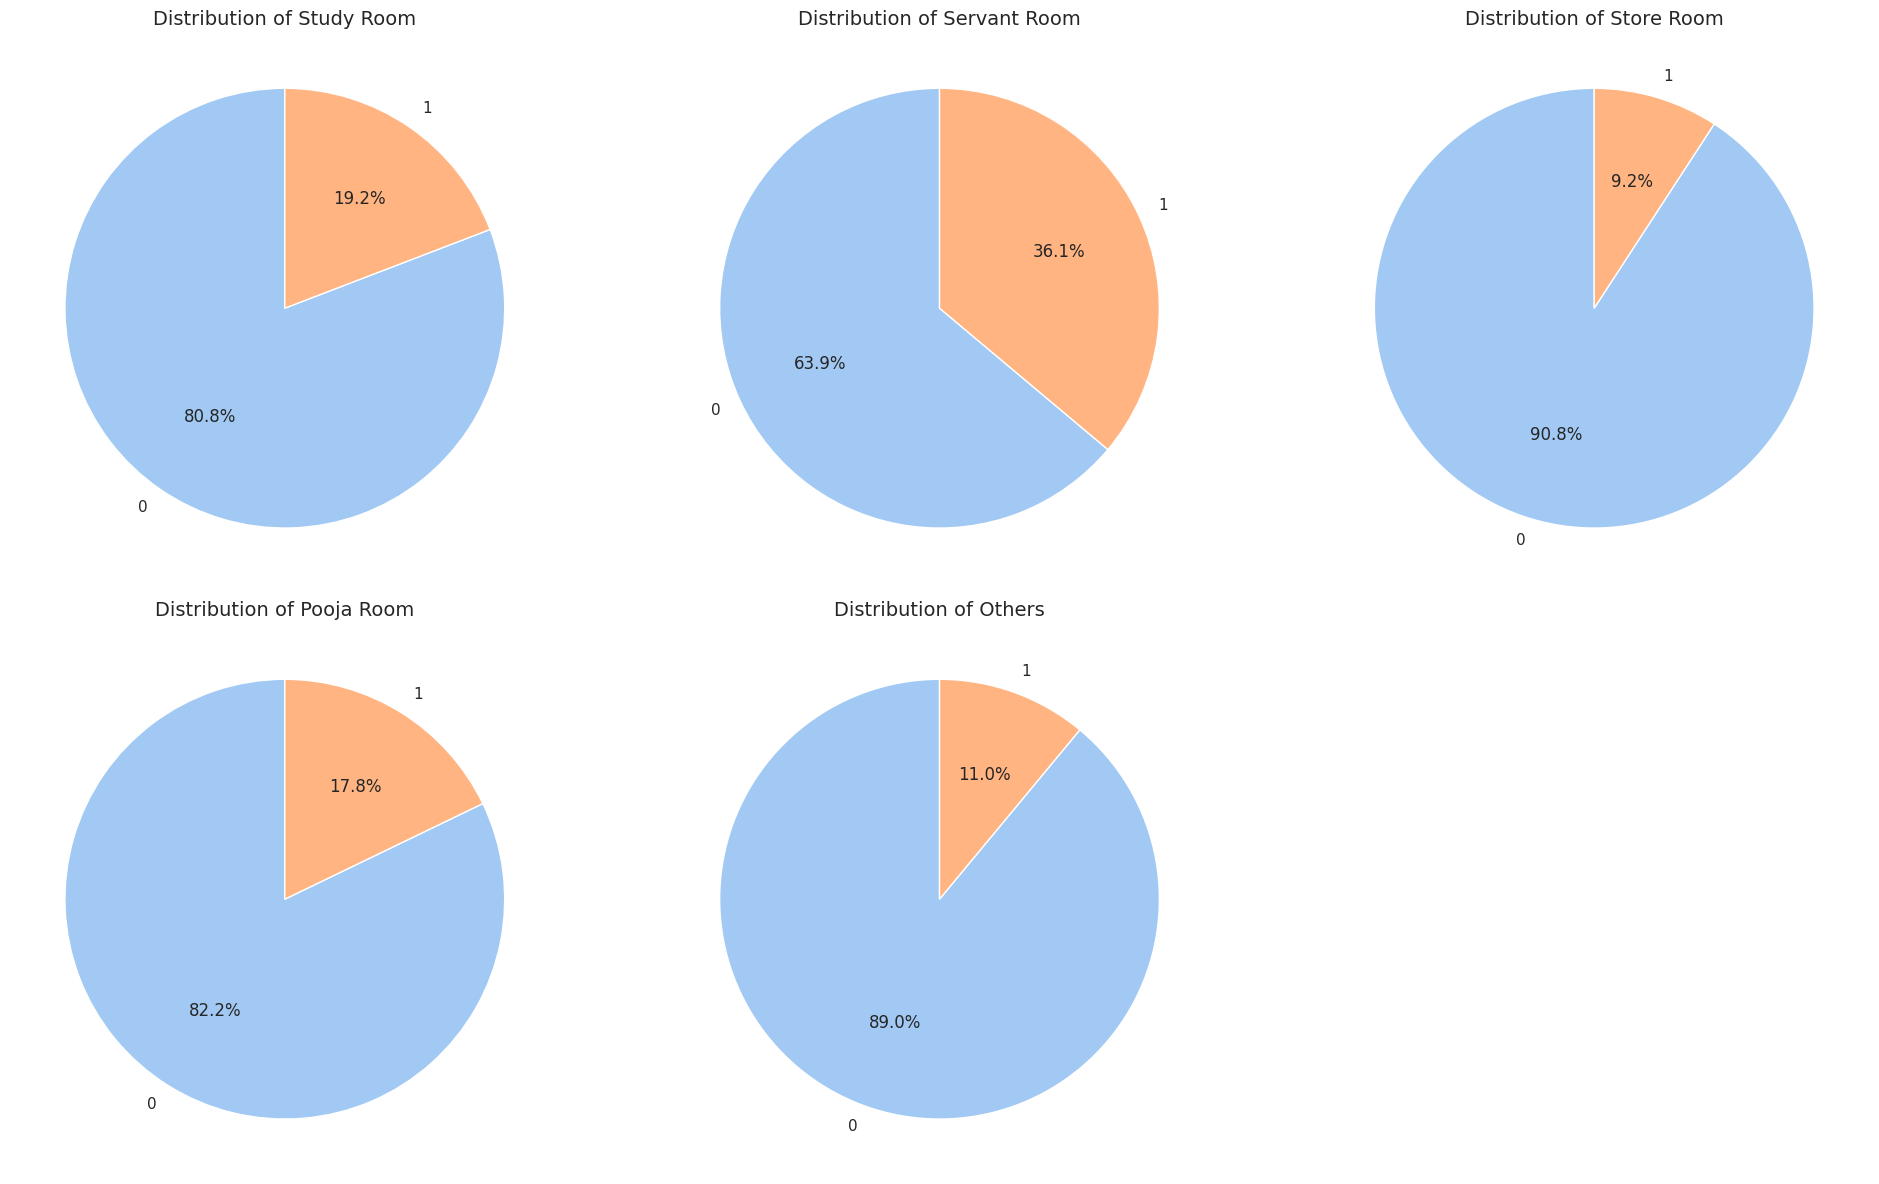

In [55]:
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, colors=colors)
    ax.set_title(f'Distribution of {room.title()}', fontsize=14)
    ax.set_ylabel('')


plt.tight_layout()

plt.show()

- **Study Room** - 81% of the houses don't have study room, only 19% of the houses have that facility.
- **Servant Room** - 64% of the houses don't have servant room, only 36% have it.
- **Store Room** - 91% of the houses don't have Store Room, only 9% have it.
- **Pooja Room** - 82% of the houses don't have Pooja Room, only 18% of the rooms have it.
- **Others** - 89% of the houses don't have others, only 11% have it.


## Furnishing Type

In [56]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

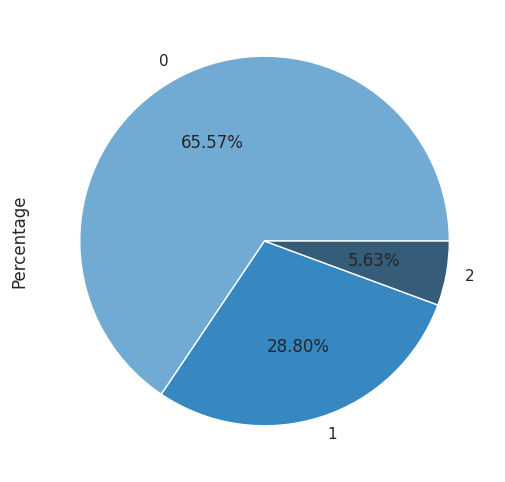

In [57]:
plt.figure(figsize=(12,6))
furnishing_normalized = df['furnishing_type'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(furnishing_normalized))
furnishing_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors)
plt.ylabel('Percentage')

# Multivariate Analysis

<Axes: xlabel='property_type', ylabel='price'>

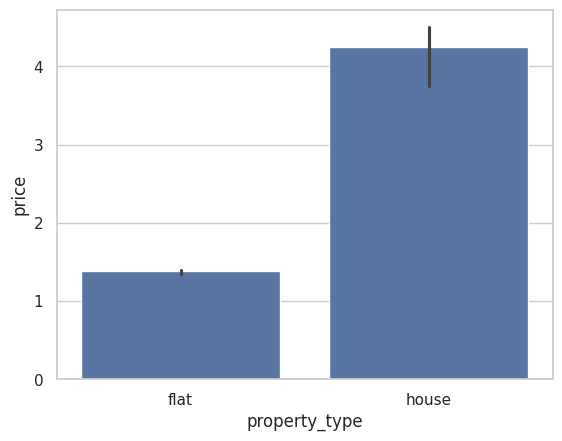

In [93]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

**Observation - Houses are costlier than flats**

<Axes: xlabel='property_type', ylabel='price'>

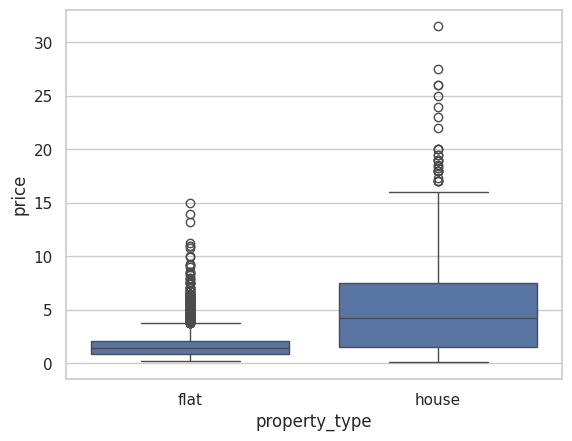

In [94]:
sns.boxplot(x=df['property_type'], y=df['price'])

<Axes: xlabel='property_type', ylabel='built_up_area'>

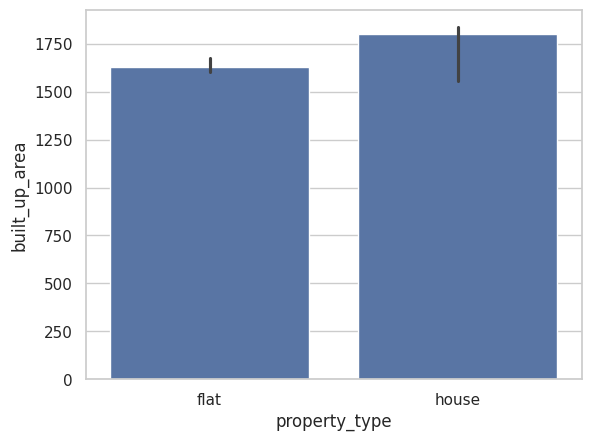

In [95]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

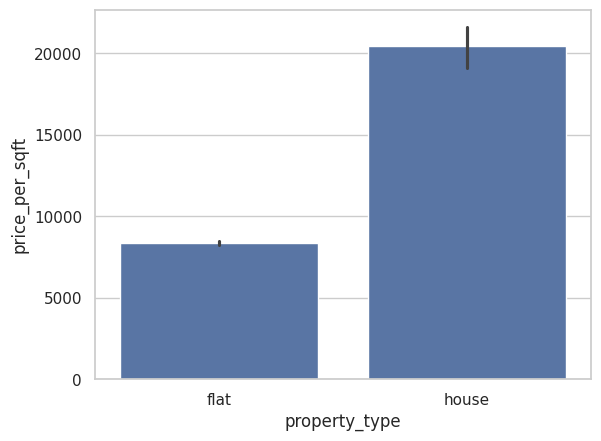

In [96]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

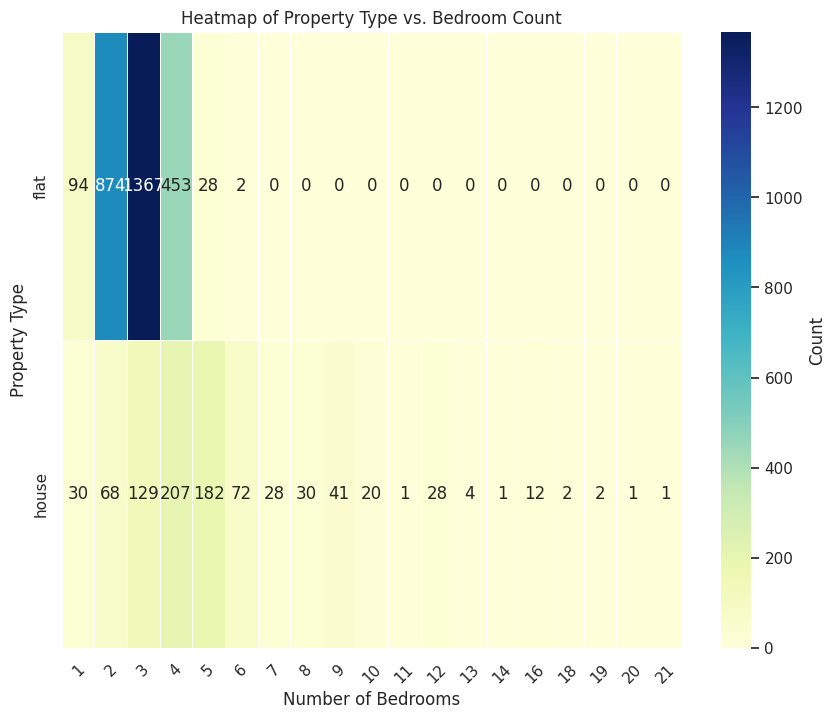

In [97]:
crosstab = pd.crosstab(df['property_type'], df['bedRoom'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Count'})

# Add titles and labels
plt.title('Heatmap of Property Type vs. Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

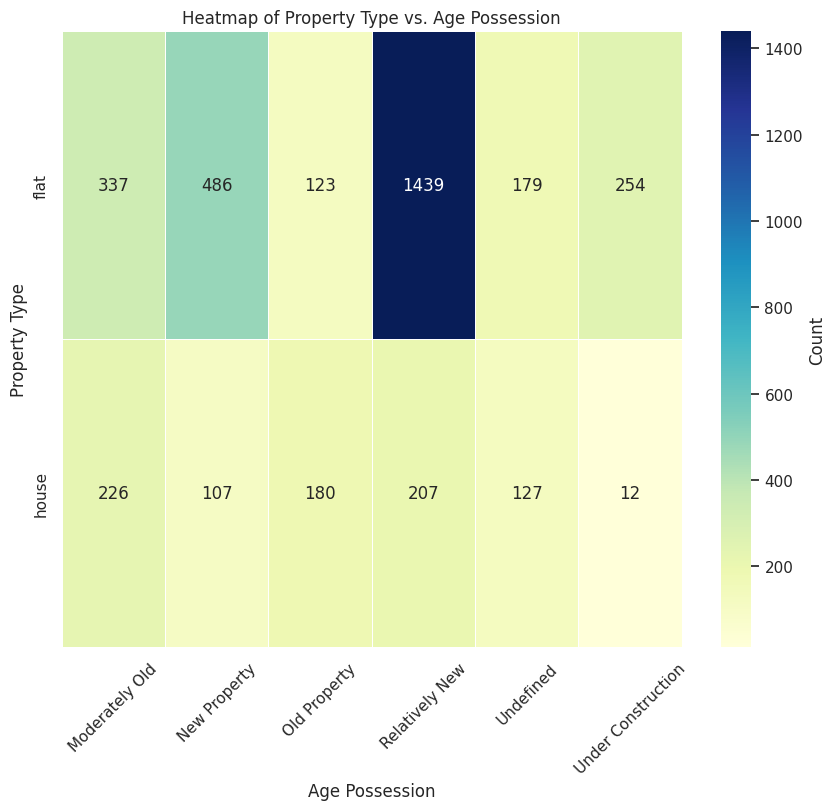

In [98]:
crosstab = pd.crosstab(df['property_type'],df['agePossession'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Count'})

# Add titles and labels
plt.title('Heatmap of Property Type vs. Age Possession')
plt.xlabel('Age Possession')
plt.ylabel('Property Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

- New Properties are generally flats.
- In Gurugram the new properties being built are mostly flats.

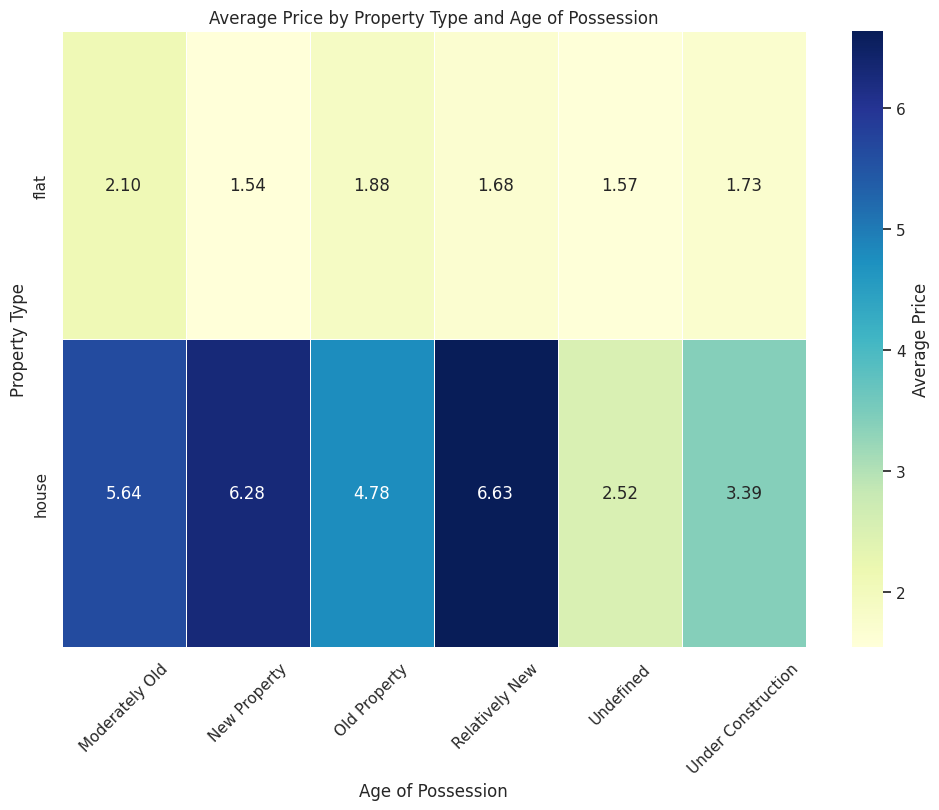

In [99]:
pivot_table = pd.pivot_table(df, index='property_type', columns='agePossession', values='price', aggfunc='mean')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with annotations, custom color palette, and improved aesthetics
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Average Price'})

# Add titles and labels
plt.title('Average Price by Property Type and Age of Possession')
plt.xlabel('Age of Possession')
plt.ylabel('Property Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Houses are more costilier than flats, and relatively new houses are costilier than older ones and under construction houses are less costlier.**

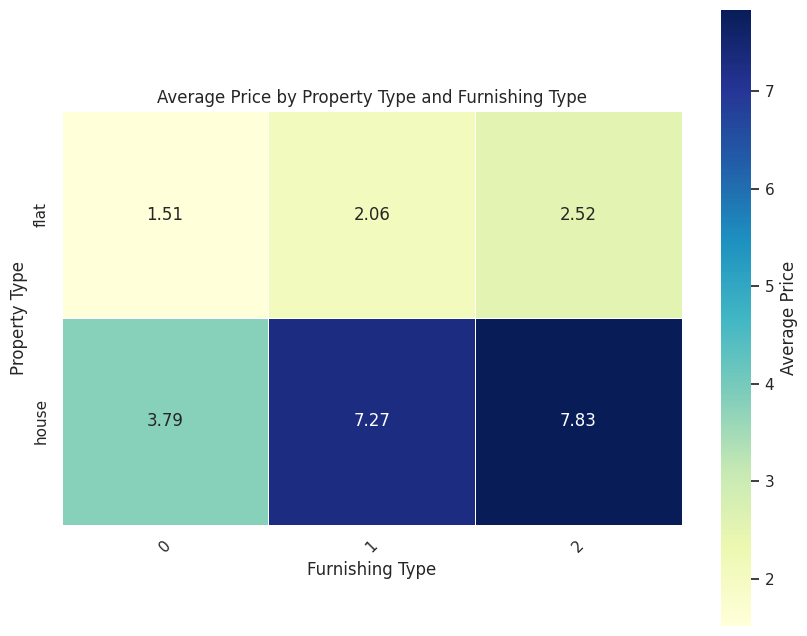

In [100]:
pivot_table = pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with annotations, custom color palette, and improved aesthetics
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Average Price'})

# Add titles and labels
plt.title('Average Price by Property Type and Furnishing Type')
plt.xlabel('Furnishing Type')
plt.ylabel('Property Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the aspect ratio to prevent squeezing
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

**Prices are increasing with the level of furnishing**

<Axes: xlabel='property_type', ylabel='luxury_score'>

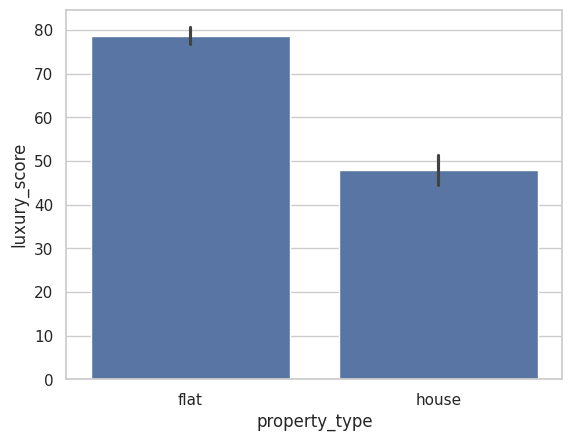

In [101]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

**Flats are more luxurious and makes sense because generally you get more luxury items like swimming pool, club house etc. in flats only**

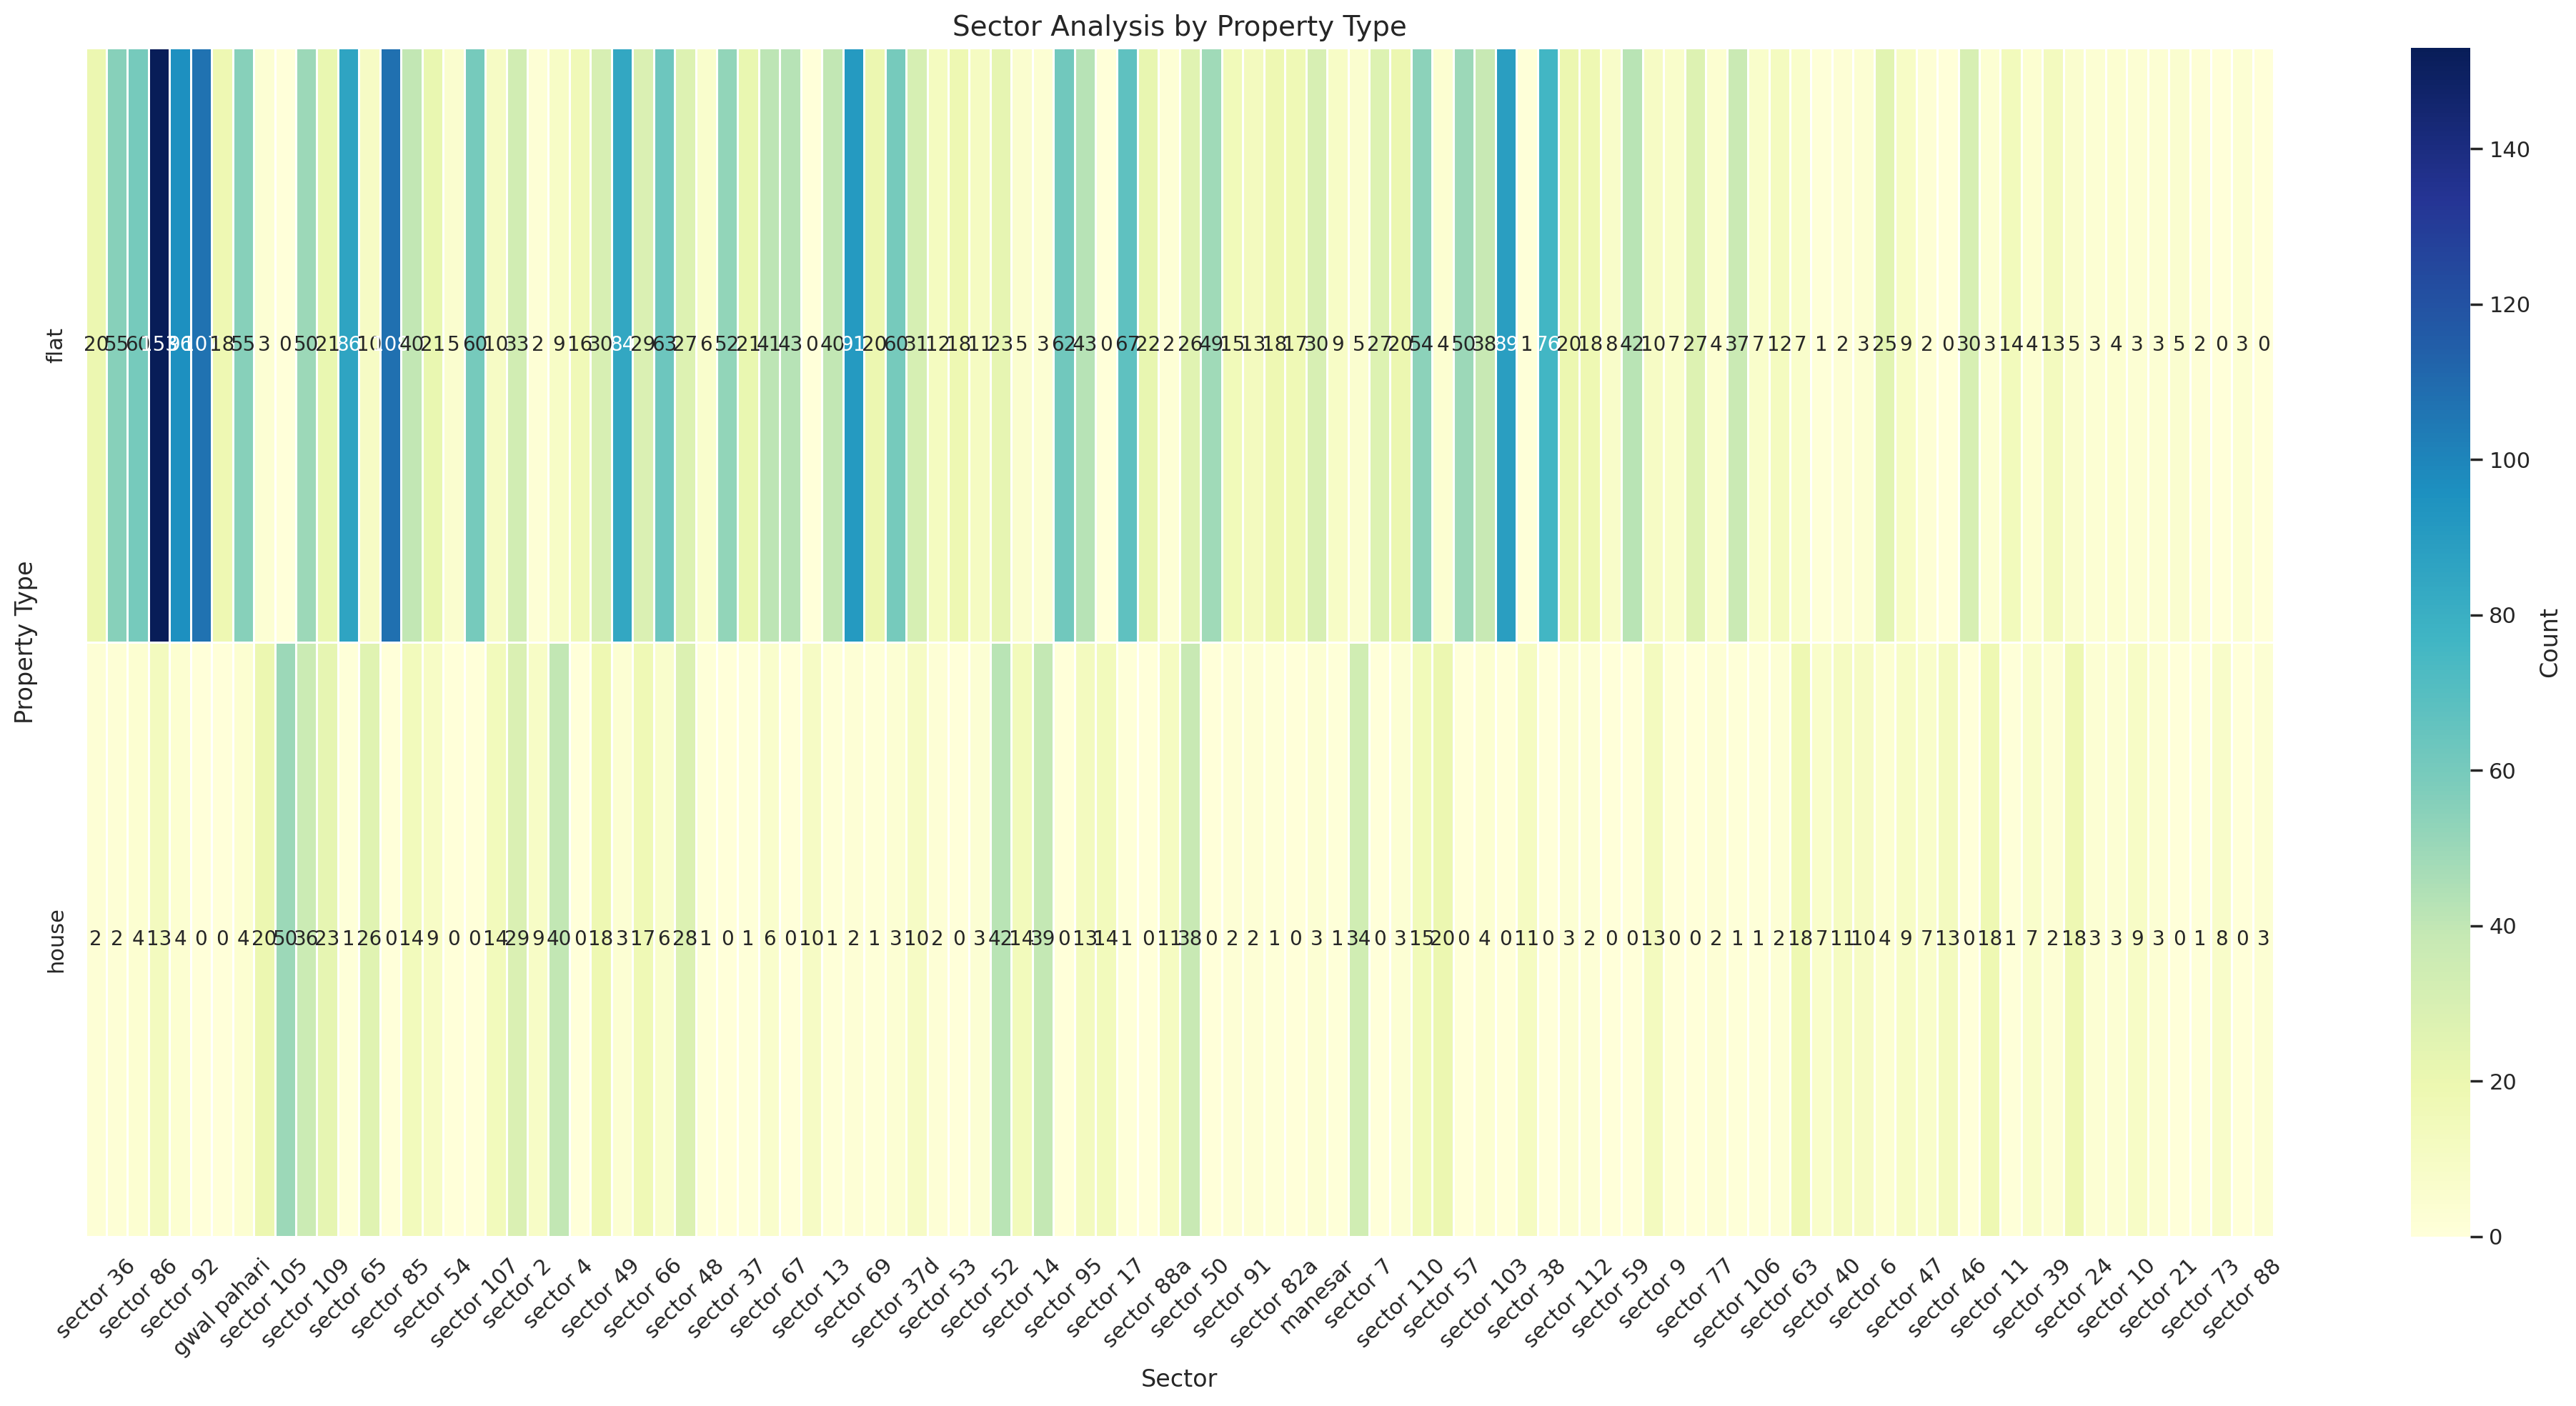

In [102]:
# Convert sector column to categorical type
df['sector'] = pd.Categorical(df['sector'], ordered=True, categories=df['sector'].unique())

# Create the crosstab
crosstab = pd.crosstab(df['property_type'], df['sector'])

# Set up the matplotlib figure with a larger size and higher DPI
plt.figure(figsize=(20, 10), dpi=200)

# Draw the heatmap with annotations, adjust font size and spacing
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Count'}, annot_kws={"size": 10})

# Add titles and labels
plt.title('Sector Analysis by Property Type', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Property Type', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In new sectors more flats are being constructed whereas in the old sectors which are 1 to 60 have more houses.
Sectors > 70 are new sectors

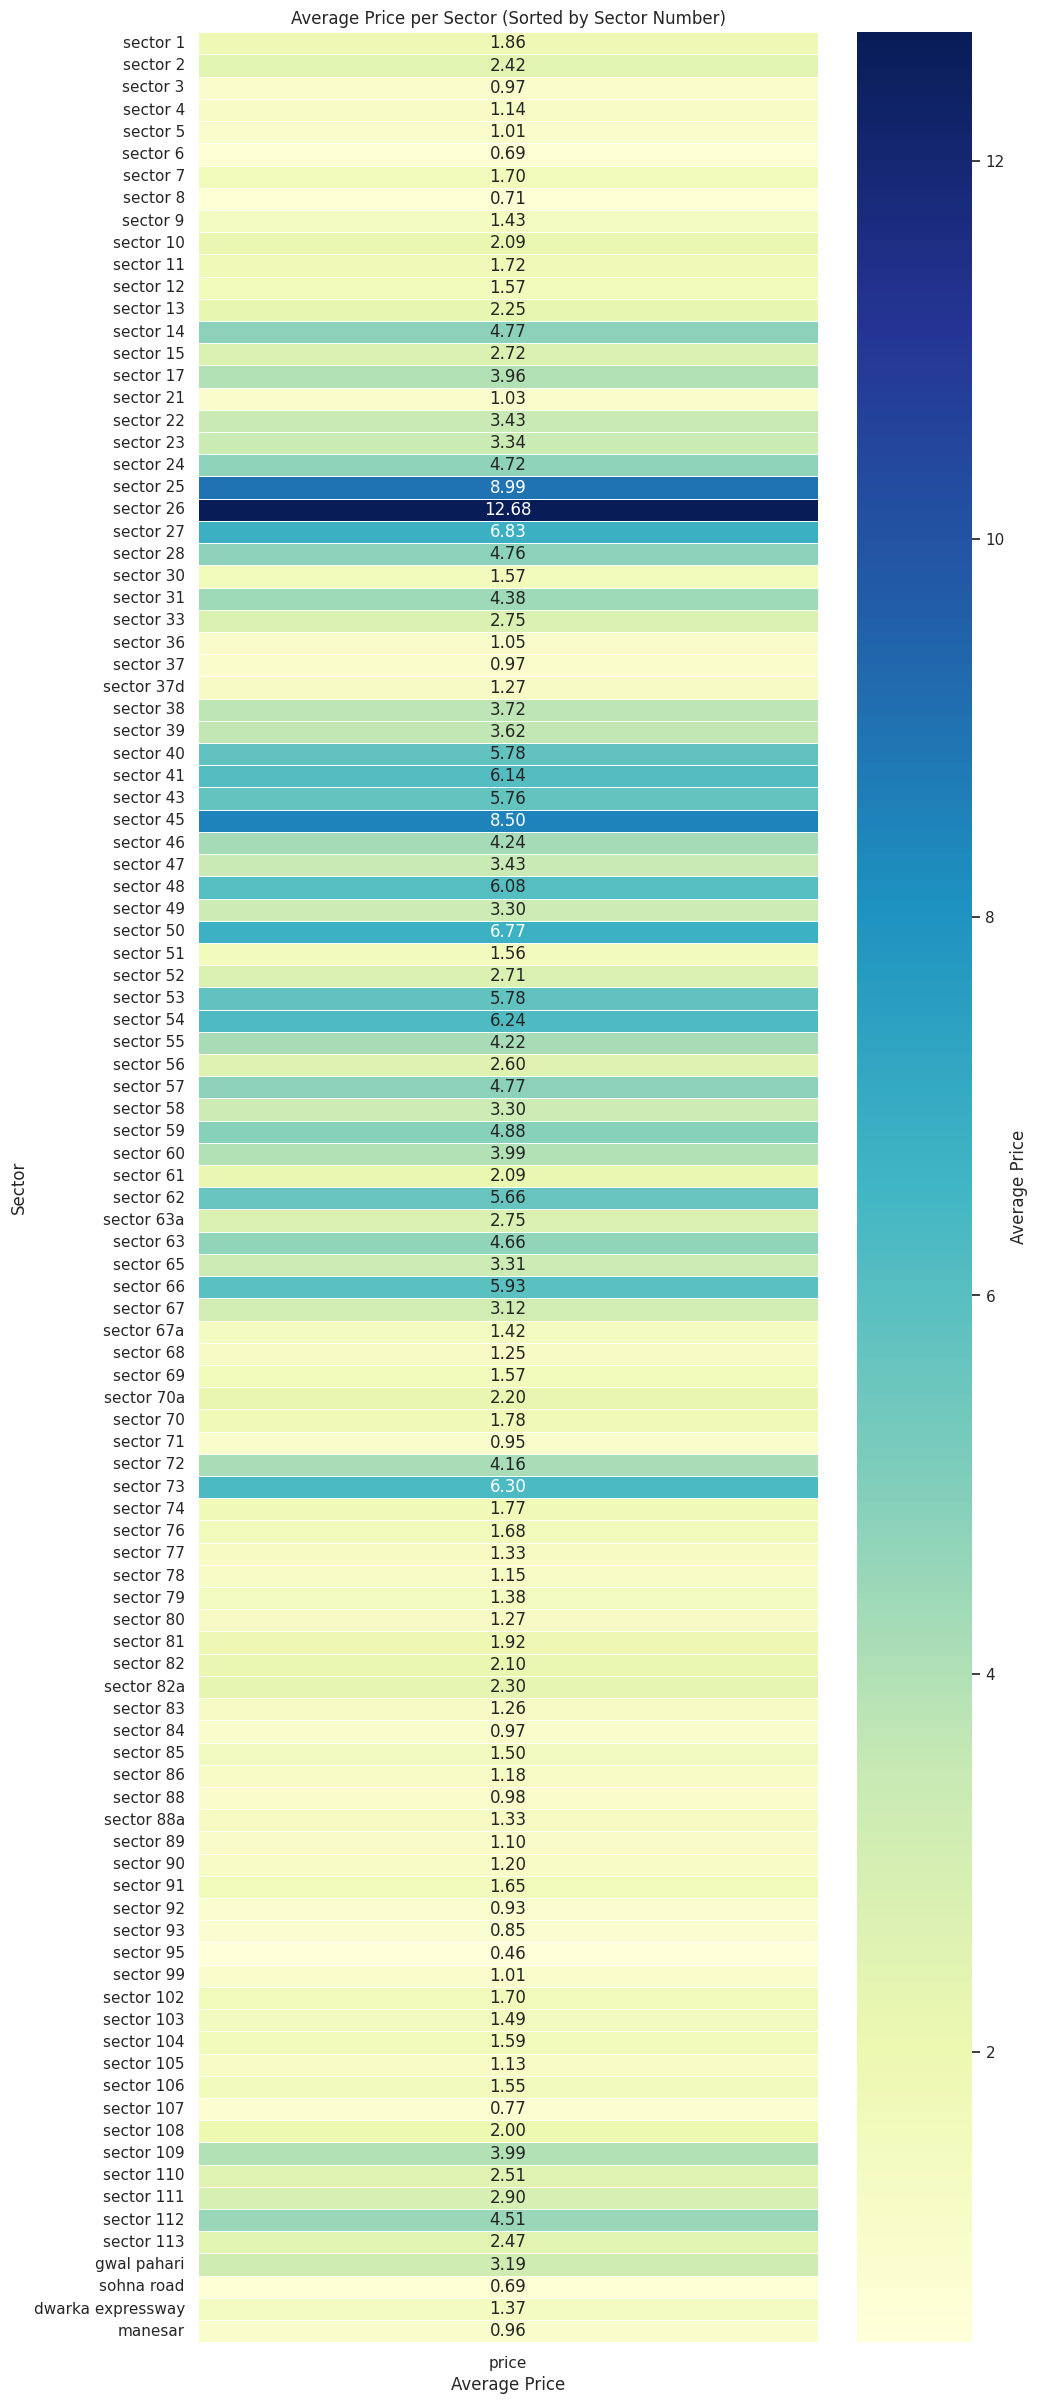

In [103]:
import re
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(10, 30))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')

# Adjust the aspect ratio to prevent squeezing
plt.gca().set_aspect('auto')

# Show the plot
plt.show()

- 25, 26, 27 are the costliest sectors
- Sector 1 to 10 - old Gurugram - Less costly properties

<Axes: xlabel='area', ylabel='price'>

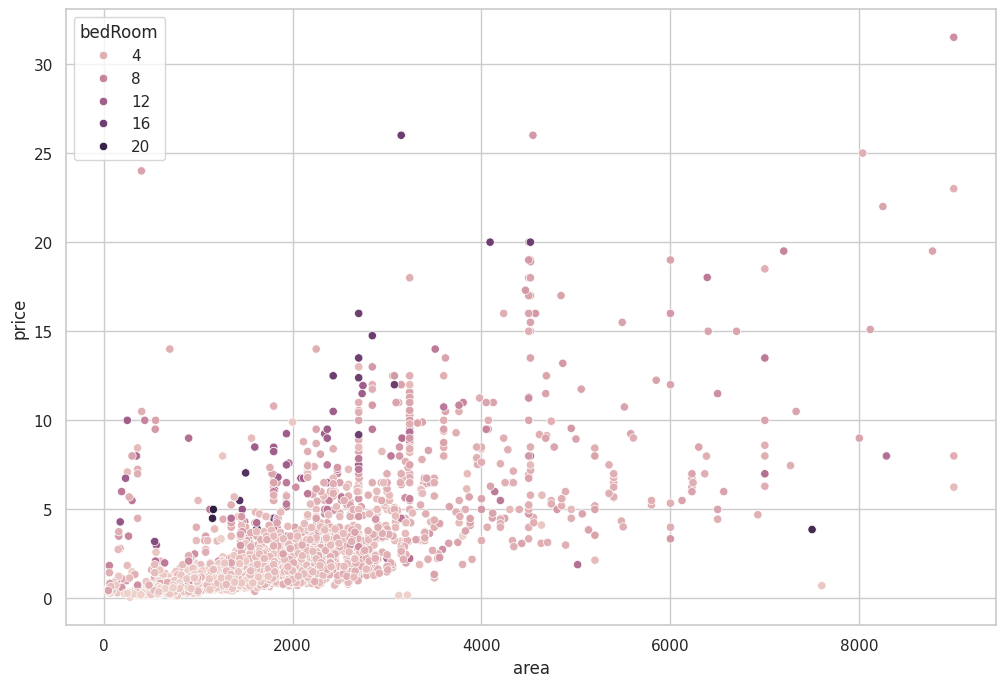

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

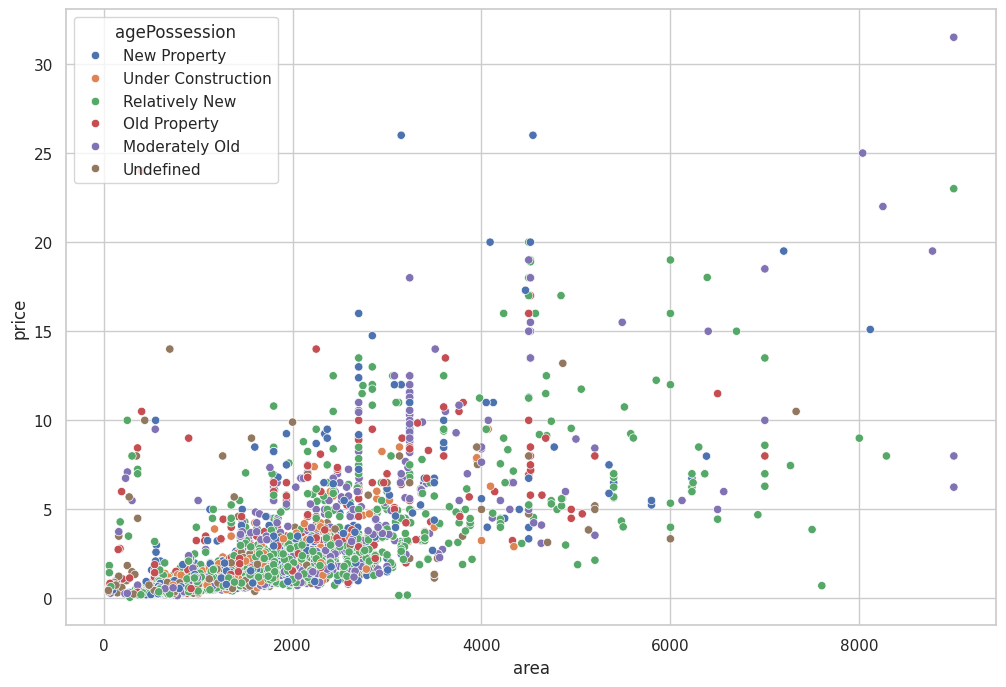

In [105]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

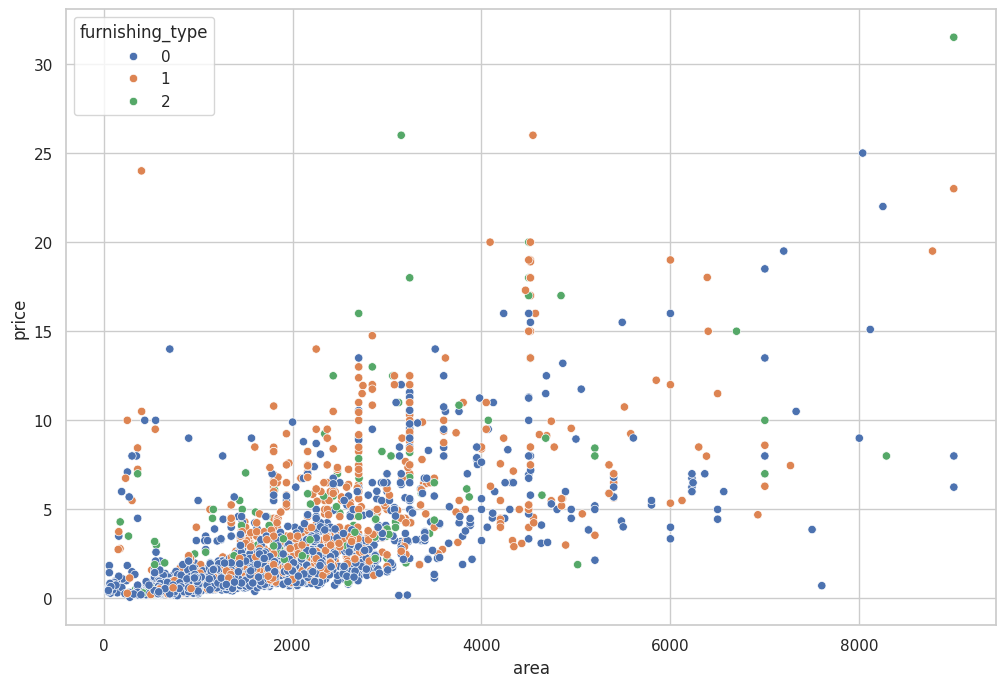

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['furnishing_type'].astype('category'))

<Axes: xlabel='bedRoom', ylabel='price'>

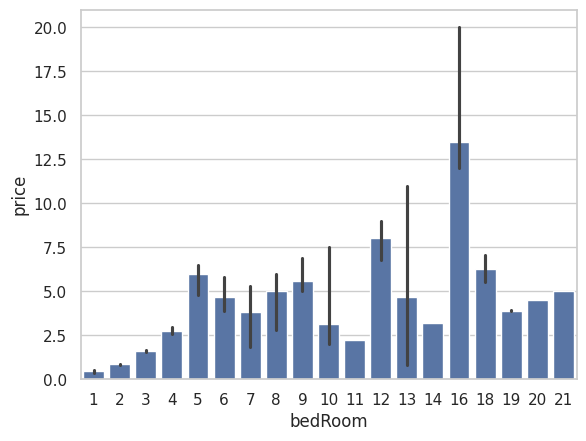

In [107]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

<Axes: xlabel='furnishing_type', ylabel='price'>

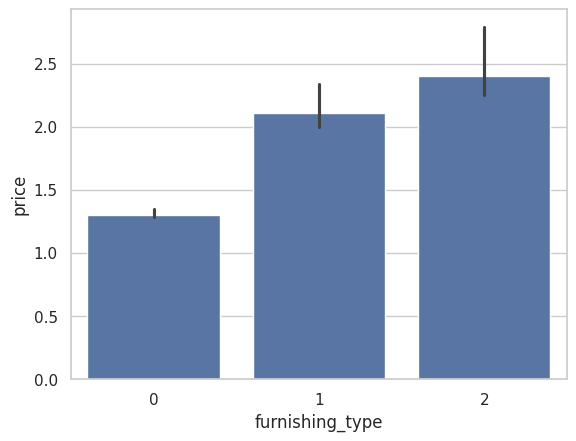

In [108]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)